# 직원 이직 예측

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,Research & Development,7.0,3,Medical,817,3,Male,...,No,11,4,0,14,3,4,13,9,7
1,0,35,Travel_Frequently,Research & Development,18.0,2,Life Sciences,1412,3,Male,...,No,11,3,0,10,2,3,2,2,2
2,0,42,Travel_Rarely,Research & Development,6.0,3,Medical,1911,3,Male,...,No,13,2,1,18,3,4,13,7,7
3,0,46,Travel_Rarely,Sales,2.0,3,Marketing,1204,3,Female,...,No,23,1,0,28,2,3,26,15,9
4,0,39,Travel_Frequently,Sales,NaN,3,Life Sciences,1812,3,Male,...,No,18,4,1,7,6,3,2,1,2
5,1,22,Travel_Frequently,Research & Development,4.0,1,Technical Degree,593,3,Male,...,No,16,3,0,4,3,3,2,2,2
6,0,24,Travel_Rarely,Research & Development,21.0,2,Technical Degree,1551,3,Male,...,No,14,2,3,2,3,3,1,1,0
7,0,34,Travel_Rarely,Research & Development,8.0,3,Medical,2068,2,Male,...,No,12,1,0,6,3,4,4,3,2
8,0,30,Travel_Rarely,Research & Development,20.0,3,Other,1084,3,Male,...,No,15,3,1,7,1,2,6,2,2
9,0,26,Travel_Rarely,Research & Development,6.0,3,Life Sciences,686,3,Female,...,Yes,13,3,1,3,2,3,3,2,2


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


<Figure size 1080x1800 with 0 Axes>

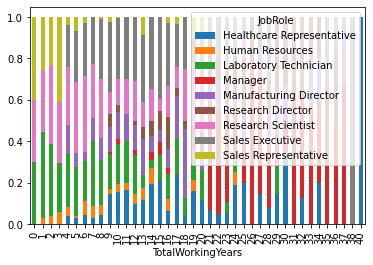

In [3]:
OR = pd.crosstab( data['TotalWorkingYears'], data['JobRole'], normalize = 'index')
plt.figure(figsize = (15,25))
OR.plot.bar(stacked = True)
plt.show()

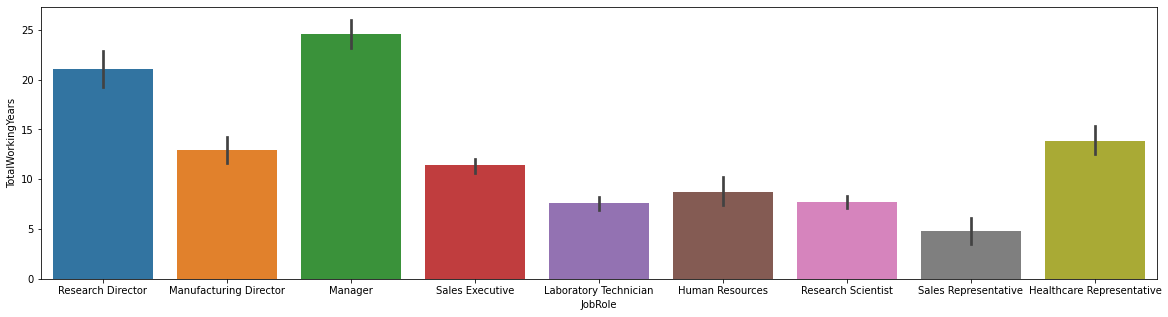

In [4]:
plt.figure(figsize = (20,5))
sns.barplot(x="JobRole", y="TotalWorkingYears", data=data)
plt.show()

----

## 1.데이터 탐색

## 2.데이터 전처리 

In [5]:
target = 'Attrition'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [6]:
# x = data.drop(target, axis = 1)
# y = data.loc[:, target]

* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

In [7]:
data.corr()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Attrition,1.000000,-0.170209,0.081973,-0.036958,-0.004939,-0.097195,-0.130454,-0.084364,-0.166861,0.054454,0.005901,-0.053857,-0.139003,-0.185029,-0.055715,-0.037603,-0.149750,-0.176072,-0.167656
Age,-0.170209,1.000000,-0.010917,0.202924,-0.018403,0.020928,0.028738,-0.016142,0.489822,0.292489,-0.007442,0.050924,0.037167,0.678051,-0.008693,-0.002516,0.315181,0.211881,0.199053
DistanceFromHome,0.081973,-0.010917,1.000000,0.014234,0.054948,-0.022426,-0.003271,-0.021623,-0.012803,-0.039472,0.052348,0.015040,0.051672,0.002606,-0.039145,-0.023166,0.008645,0.017755,0.008045
Education,-0.036958,0.202924,0.014234,1.000000,0.035299,-0.011476,0.063356,-0.026800,0.084006,0.115528,-0.009160,0.000458,0.035575,0.141025,-0.014650,0.023149,0.073020,0.068414,0.082891
EmployeeNumber,-0.004939,-0.018403,0.054948,0.035299,1.000000,0.019757,0.012572,-0.029219,-0.013571,-0.013080,-0.002839,-0.085708,0.071106,-0.015674,0.004745,0.017754,-0.017434,-0.015468,-0.018975
EnvironmentSatisfaction,-0.097195,0.020928,-0.022426,-0.011476,0.019757,1.000000,0.005208,-0.013242,0.001249,0.021275,-0.051452,0.018290,-0.002147,-0.001444,-0.051192,0.025798,-0.011527,0.004981,-0.006419
JobInvolvement,-0.130454,0.028738,-0.003271,0.063356,0.012572,0.005208,1.000000,-0.026601,-0.012065,0.032613,-0.018453,0.045831,0.015146,-0.010169,-0.027776,-0.016226,-0.028314,0.016360,0.026148
JobSatisfaction,-0.084364,-0.016142,-0.021623,-0.026800,-0.029219,-0.013242,-0.026601,1.000000,-0.023258,-0.047899,0.029032,-0.000973,0.022907,-0.038403,0.005702,-0.015702,-0.016531,-0.011170,-0.034294
MonthlyIncome,-0.166861,0.489822,-0.012803,0.084006,-0.013571,0.001249,-0.012065,-0.023258,1.000000,0.141670,-0.027852,0.021896,0.019676,0.766927,-0.013954,0.048163,0.523550,0.364796,0.339088
NumCompaniesWorked,0.054454,0.292489,-0.039472,0.115528,-0.013080,0.021275,0.032613,-0.047899,0.141670,1.000000,0.001516,0.035915,0.031366,0.228027,-0.091086,0.000365,-0.126209,-0.094254,-0.118094


In [8]:
drop_col = ['EmployeeNumber', 'PercentSalaryHike', 'Department', 'RelationshipSatisfaction', 'EducationField', 'TrainingTimesLastYear']
data.drop(drop_col, axis = 1, inplace = True)
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,7.0,3,3,Male,3,Research Director,3,Married,11691,0.0,No,0,14,4,13,9,7
1,0,35,Travel_Frequently,18.0,2,3,Male,3,Manufacturing Director,4,Single,9362,2.0,No,0,10,3,2,2,2
2,0,42,Travel_Rarely,6.0,3,3,Male,3,Research Director,1,Married,13348,9.0,No,1,18,4,13,7,7
3,0,46,Travel_Rarely,2.0,3,3,Female,3,Manager,1,Married,17048,8.0,No,0,28,3,26,15,9
4,0,39,Travel_Frequently,NaN,3,3,Male,3,Sales Executive,4,Divorced,4127,2.0,No,1,7,3,2,1,2


### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [9]:
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DistanceFromHome           54
Education                   0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         21
OverTime                    0
StockOptionLevel            0
TotalWorkingYears           0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

In [10]:
data['DistanceFromHome'].fillna(2 ,inplace = True)
data['NumCompaniesWorked'].fillna(1,inplace = True)

In [11]:
data.isna().sum()

Attrition                  0
Age                        0
BusinessTravel             0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
StockOptionLevel           0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsWithCurrManager       0
dtype: int64

In [12]:
data.head()

,Attrition,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,0,33,Travel_Rarely,7.0,3,3,Male,3,Research Director,3,Married,11691,0.0,No,0,14,4,13,9,7
1,0,35,Travel_Frequently,18.0,2,3,Male,3,Manufacturing Director,4,Single,9362,2.0,No,0,10,3,2,2,2
2,0,42,Travel_Rarely,6.0,3,3,Male,3,Research Director,1,Married,13348,9.0,No,1,18,4,13,7,7
3,0,46,Travel_Rarely,2.0,3,3,Female,3,Manager,1,Married,17048,8.0,No,0,28,3,26,15,9
4,0,39,Travel_Frequently,2.0,3,3,Male,3,Sales Executive,4,Divorced,4127,2.0,No,1,7,3,2,1,2


### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [13]:
cols = ['JobRole', 'BusinessTravel','MaritalStatus', 'WorkLifeBalance','StockOptionLevel','OverTime', 'Gender', 'EnvironmentSatisfaction', 'JobInvolvement', 'Education']
data = pd.get_dummies(data, columns = cols, drop_first = True)
data.head()

,Attrition,Age,DistanceFromHome,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,Education_2,Education_3,Education_4,Education_5
0,0,33,7.0,3,11691,0.0,14,13,9,7,...,0,1,0,0,1,0,0,1,0,0
1,0,35,18.0,4,9362,2.0,10,2,2,2,...,0,1,0,0,1,0,1,0,0,0
2,0,42,6.0,1,13348,9.0,18,13,7,7,...,0,1,0,0,1,0,0,1,0,0
3,0,46,2.0,1,17048,8.0,28,26,15,9,...,0,1,0,0,1,0,0,1,0,0
4,0,39,2.0,4,4127,2.0,7,2,1,2,...,0,1,0,0,1,0,0,1,0,0


In [14]:
x = data.drop(target, axis = 1)
y = data[target]

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수에 대해서 주석으로 설명하시오.

### 2.5 데이터 분할

* test 200건(test_size = 200), random_state = 2022
* val 200건(test_size = 200), random_state = 2022
* train 나머지.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=2021)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [17]:
x_train = (x_train - x_train.min())/(x_train.max()-x_train.min())
x_test = (x_test - x_test.min())/(x_test.max()-x_test.min())

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Logistic Regression 모델링

In [21]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train, y_train, cv = 10)
print(cv_score.mean())
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
result = {}
result['LogisticR'] = accuracy_score(y_test, y_pred)

0.883477011494253
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       314
           1       0.72      0.38      0.49        61

    accuracy                           0.87       375
   macro avg       0.80      0.67      0.71       375
weighted avg       0.86      0.87      0.86       375



<BarContainer object of 39 artists>

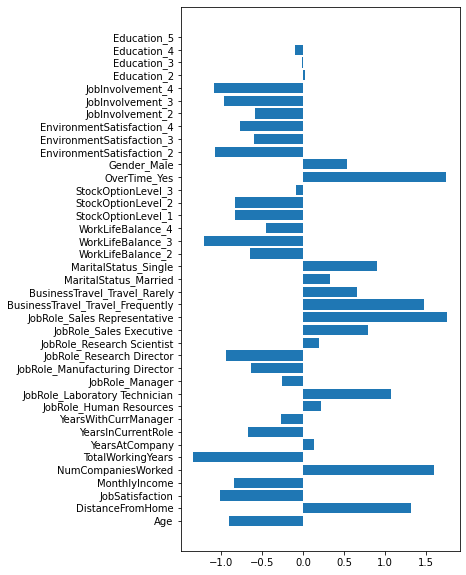

In [23]:
plt.figure(figsize = (5,10))
plt.barh(y = list(x_train), width = model.coef_.reshape(-1))

#### (2) Decision Tree 모델링

In [24]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train ,y_train, cv = 10)
print(cv_score.mean())
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
result['Tree'] = accuracy_score(y_test, y_pred)

0.7920323928944619
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       314
           1       0.46      0.43      0.44        61

    accuracy                           0.83       375
   macro avg       0.68      0.67      0.67       375
weighted avg       0.82      0.83      0.82       375



#### (3) KNN 모델링

In [25]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train ,y_train, cv = 10)
print(cv_score.mean())
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
result['KNN'] = accuracy_score(y_test, y_pred)

0.8525992685475444
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       314
           1       0.80      0.13      0.23        61

    accuracy                           0.85       375
   macro avg       0.83      0.56      0.57       375
weighted avg       0.85      0.85      0.81       375



#### (4) SVM 모델링

In [26]:
model = SVC(C = 100, gamma = 0.01)
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train ,y_train, cv = 10)
print(cv_score.mean())
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
result['SVM'] = accuracy_score(y_test, y_pred)

0.8812565308254964
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       314
           1       0.60      0.39      0.48        61

    accuracy                           0.86       375
   macro avg       0.74      0.67      0.70       375
weighted avg       0.84      0.86      0.85       375



#### (5) Random Forest 모델링

In [27]:
model = RandomForestClassifier(max_depth=5)
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train ,y_train, cv = 10)
print(cv_score.mean())
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
result['Forest'] = accuracy_score(y_test, y_pred)

0.8525731452455589
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       314
           1       0.82      0.15      0.25        61

    accuracy                           0.86       375
   macro avg       0.84      0.57      0.59       375
weighted avg       0.85      0.86      0.81       375



#### (6) XGB 모델링

In [28]:
model = XGBClassifier()
model.fit(x_train, y_train)
cv_score = cross_val_score(model, x_train ,y_train, cv = 10)
print(cv_score.mean())
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
result['XGB'] = accuracy_score(y_test, y_pred)

[15:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8480407523510971
0.8666666666666667


## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [30]:
x_train.shape, y_train.shape

((875, 39), (875,))

* 모델1 

In [34]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape = (39,)))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
es = EarlyStopping(monitor = 'val_accuracy',
                  min_delta=0,
                  patience = 5,
                  verbose = 1,
                  restore_best_weights=True)
mc = ModelCheckpoint('Employee_Attrition.h5', save_best_only=True, verbose = 1)

In [48]:
model.fit(x_train, y_train, verbose = 1, epochs = 500, validation_split=0.2, callbacks = [es,mc])

Epoch 1/500
22/22 [==============================] - 0s 11ms/step - loss: 0.0828 - accuracy: 0.9714 - val_loss: 0.5116 - val_accuracy: 0.8400

Epoch 00001: val_loss improved from inf to 0.51156, saving model to Employee_Attrition.h5
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0469 - accuracy: 0.9886 - val_loss: 0.6173 - val_accuracy: 0.8343

Epoch 00002: val_loss did not improve from 0.51156
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.5247 - val_accuracy: 0.8686

Epoch 00003: val_loss did not improve from 0.51156
Epoch 4/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0431 - accuracy: 0.9829 - val_loss: 0.8543 - val_accuracy: 0.8286

Epoch 00004: val_loss did not improve from 0.51156
Epoch 5/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.9986 - val_loss: 0.7135 - val_accuracy: 0.8514

Epoch 00005: val_loss did not improve from 0.5

In [37]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred.reshape(-1).round(0)))
result['DL1'] = accuracy_score(y_test,y_pred.reshape(-1).round(0))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       314
           1       0.52      0.41      0.46        61

    accuracy                           0.84       375
   macro avg       0.71      0.67      0.68       375
weighted avg       0.83      0.84      0.83       375



* 모델2

In [39]:
keras.backend.clear_session()

il = keras.layers.Input(shape = (39,))
hl = keras.layers.Dense(150, activation = 'relu')(il)
hl = keras.layers.Dense(150, activation = 'relu')(hl)
hl = keras.layers.Dense(150, activation = 'relu')(hl)
ol = keras.layers.Dense(1, activation = 'sigmoid')(hl)
model = keras.models.Model(il, ol)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
es = EarlyStopping(monitor = 'val_loss',
                  min_delta=0,
                  patience = 5,
                  verbose = 1,
                  restore_best_weights=True)
mc = ModelCheckpoint('Employee_Attrition.h5', save_best_only=True, verbose = 1)

In [49]:
model.fit(x_train, y_train, verbose = 1, epochs = 500, validation_split=0.2, callbacks = [es,mc], batch_size = 128)

Epoch 1/500
6/6 [==============================] - 0s 25ms/step - loss: 0.0256 - accuracy: 0.9943 - val_loss: 0.6773 - val_accuracy: 0.8457

Epoch 00001: val_loss did not improve from 0.51156
Epoch 2/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 0.6351 - val_accuracy: 0.8629

Epoch 00002: val_loss did not improve from 0.51156
Epoch 3/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.6762 - val_accuracy: 0.8571

Epoch 00003: val_loss did not improve from 0.51156
Epoch 4/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.7543 - val_accuracy: 0.8343

Epoch 00004: val_loss did not improve from 0.51156
Epoch 5/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.7067 - val_accuracy: 0.8571

Epoch 00005: val_loss did not improve from 0.51156
Epoch 6/500
6/6 [=======================

In [50]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred.reshape(-1).round(0)))
result['DL'] = accuracy_score(y_test,y_pred.reshape(-1).round(0))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       314
           1       0.59      0.38      0.46        61

    accuracy                           0.86       375
   macro avg       0.74      0.66      0.69       375
weighted avg       0.84      0.86      0.84       375



## 5.성능 비교
* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * 평가지표 선정 이유도 주석으로 기술하시오.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

<function matplotlib.pyplot.show(close=None, block=None)>

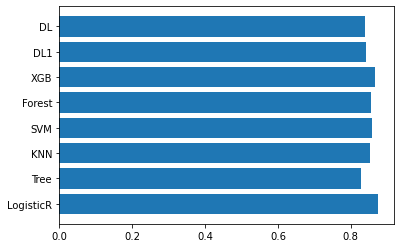

In [43]:
plt.barh(y = list(result), width = result.values())
plt.show

In [44]:
print(result)

{'LogisticR': 0.8746666666666667, 'Tree': 0.8266666666666667, 'KNN': 0.8533333333333334, 'SVM': 0.8586666666666667, 'Forest': 0.856, 'XGB': 0.8666666666666667, 'DL1': 0.8426666666666667, 'DL': 0.84}


### accuracy_score을 이용하여 성능을 평가. DL이나 ML의 Logisitc Regression을 이용